In [2]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from nltk.util import ngrams
import numpy as np

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
DF = pd.read_csv("C:/Users/giulia macis/Desktop/UBISOFT/goodvideogames/youtube_comments_ZdVO_fYoF5g.csv")
DF

,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount
0,https://www.youtube.com/watch?v=ZdVO_fYoF5g,The Legend of Zelda: Tears of the Kingdom Review,2023-05-11T12:00:22Z,@IGN,Thank you for watching be sure to check out al...,2023-05-12T18:47:16Z,10,413
1,https://www.youtube.com/watch?v=ZdVO_fYoF5g,The Legend of Zelda: Tears of the Kingdom Review,2023-05-11T12:00:22Z,@oliveiraluis3540,Link and the princess outta have some kiddos a...,2024-11-02T11:01:19Z,0,0
2,https://www.youtube.com/watch?v=ZdVO_fYoF5g,The Legend of Zelda: Tears of the Kingdom Review,2023-05-11T12:00:22Z,@imjade1520,Can someone please tell me the name of the sou...,2024-10-14T21:09:32Z,1,1
3,https://www.youtube.com/watch?v=ZdVO_fYoF5g,The Legend of Zelda: Tears of the Kingdom Review,2023-05-11T12:00:22Z,@MerlinMAVK,Been playing games since the dawn of the Atari...,2024-10-05T02:00:09Z,0,1
4,https://www.youtube.com/watch?v=ZdVO_fYoF5g,The Legend of Zelda: Tears of the Kingdom Review,2023-05-11T12:00:22Z,@WarnerZebulon-f9k,Maggio Mission,2024-10-03T08:19:11Z,0,0
...,...,...,...,...,...,...,...,...
2060,https://www.youtube.com/watch?v=ZdVO_fYoF5g,The Legend of Zelda: Tears of the Kingdom Review,2023-05-11T12:00:22Z,@raisklose6785,Issa 10,2023-05-11T12:00:45Z,0,0
2061,https://www.youtube.com/watch?v=ZdVO_fYoF5g,The Legend of Zelda: Tears of the Kingdom Review,2023-05-11T12:00:22Z,@MMoer,Last,2023-05-11T12:00:43Z,0,3
2062,https://www.youtube.com/watch?v=ZdVO_fYoF5g,The Legend of Zelda: Tears of the Kingdom Review,2023-05-11T12:00:22Z,@wazzuppoo,performance is awful on switch,2023-05-11T12:00:43Z,1,6
2063,https://www.youtube.com/watch?v=ZdVO_fYoF5g,The Legend of Zelda: Tears of the Kingdom Review,2023-05-11T12:00:22Z,@JakeBalla,First,2023-05-11T12:00:40Z,0,1


In [4]:
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update([
    'take', 'studio', 'got', 'people', 'get', 'best offer',
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score','video','review'
])
new_stopwords = set(stopwords.words('english'))
new_stopwords.update([
    'good', 'like', 'concord', 'take', 'studio', 'got', 'people', 'get', 'best offer',
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score',"game",
     "review", "game", "score", "played", "time", "getting", "gaming", "worth", 
    "buying", "guys", "true", "help","goty","look","first","lol","better","one",
    "give","enough","ever","wait""gon","going","let","word","gon","legend", "zelda", 
    "tears", "kingdom", "link", "princess", "game", "mission", "review", "watching", 
    "check", "playing", "games", "please", "someone", "name","breath","gave","elden"
    

])
lmtzr = WordNetLemmatizer()

In [5]:
# Define reusable functions

def preprocess_text(text):
    """Preprocess text by lowercasing, removing punctuation, tokenizing, and filtering stopwords."""
    if not isinstance(text, str):
        return ""
    tokens = word_tokenize(text.lower().translate(str.maketrans('', '', string.punctuation)))
    tokens = [lmtzr.lemmatize(word) for word in tokens if word not in custom_stopwords and len(word) >= 3]
    return ' '.join(tokens)

def get_sentiment(text):
    """Classify sentiment of text as positive, negative, or neutral."""
    score = analyzer.polarity_scores(text)
    negative_words = ["suck", "sucks", "done", "worst", "hate", "disappointed", "disgusted","shit","dog shit", ]
    if any(word in text.lower() for word in negative_words):
        return 'negative'
    elif score['compound'] >= 0.01:
        return 'positive'
    elif score['compound'] <= -0.01:
        return 'negative'
    else:
        return 'neutral'

def text_processing(texts):
    """Further clean and tokenize text for topic modeling."""
    texts = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]
    texts = [[word for word in text.lower().split()] for text in texts]
    texts = [[lmtzr.lemmatize(word) for word in text if word not in new_stopwords and len(word) >= 3] for text in texts]
    return texts

def bigram_analysis(comments, top_n=30):
    """Generate bigrams from tokenized comments and plot the frequency distribution."""
    all_tokens = [word_tokenize(comment) for comment in comments]
    all_ngrams = [ngram for tokens in all_tokens for ngram in ngrams(tokens, 2)]
    freq_dist_ngrams = FreqDist(all_ngrams)
    
    # Convert to DataFrame and sort
    df_ngrams = pd.DataFrame(list(freq_dist_ngrams.items()), columns=['n-gram', 'frequency'])
    df_ngrams = df_ngrams.sort_values(by='frequency', ascending=False)
    
    # Plot top n bigrams
    plt.figure(figsize=(12, 6))
    plt.bar(
        df_ngrams['n-gram'][:top_n].apply(lambda x: ' '.join(x)),  
        df_ngrams['frequency'][:top_n]
    )
    plt.title(f'Top {top_n} Bigram Frequency Distribution')
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()
    
    return df_ngrams


In [6]:
# Convert to datetime and extract only the date part
DF['releaseDate'] = pd.to_datetime(DF['releaseDate'].astype(str).str.replace('Z', '')).dt.date
DF['publishedTimeText'] = pd.to_datetime(DF['publishedTimeText'].astype(str).str.replace('Z', '')).dt.date

# Define the one-week period after the release date
release_date = DF['releaseDate'][0]
one_week_after_release = release_date + pd.DateOffset(weeks=1)
one_week_after_release = one_week_after_release.date()  # Convert to date format

# Filter for comments within the first week after the release date
df = DF[(DF['publishedTimeText'] >= release_date) & (DF['publishedTimeText'] <= one_week_after_release)]

# Select relevant columns and preprocess comments
df = df[['publishedTimeText', 'comment']]
df['processed_comments'] = df['comment'].apply(preprocess_text)

# Display the filtered DataFrame
df


,publishedTimeText,comment,processed_comments
0,2023-05-12,Thank you for watching be sure to check out al...,thank sure check guide interactive map help ke...
252,2023-05-18,This game is the best game i’ve played since 0...,game best game played since mw2
253,2023-05-18,looney tunes LOONaCy,looney tune loonacy
254,2023-05-18,Meh…. 2/10,meh… 210
255,2023-05-18,Nintendo did hint us that there would be some ...,nintendo hint would underground exploration fi...
...,...,...,...
2060,2023-05-11,Issa 10,issa
2061,2023-05-11,Last,last
2062,2023-05-11,performance is awful on switch,performance awful switch
2063,2023-05-11,First,first


In [7]:
# Randomly sample 500 rows with a fixed random_state for reproducibility
df = df.sample(n=500, random_state=2).reset_index(drop=True)  # Use any integer as the random_state

In [8]:
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['comment'].apply(get_sentiment)
most_common_sentiment = df['sentiment'].value_counts().idxmax()
print(f'The video has mostly {most_common_sentiment} comments.')
df

The video has mostly positive comments.


,publishedTimeText,comment,processed_comments,sentiment
0,2023-05-11,So.... Far cry 4 map was in primal. Ubisoft go...,far cry map primal ubisoft hated map completel...,negative
1,2023-05-11,This is the same channel that put breath of th...,channel put breath wild best zelda game let ma...,positive
2,2023-05-11,The Legend of Zelda series (in my opinion) is ...,legend zelda series opinion greatest gaming se...,positive
3,2023-05-11,Whish they released the game with a switch pro...,whish released game switch pro,neutral
4,2023-05-11,Mild Shock,mild shock,negative
...,...,...,...,...
495,2023-05-12,It has a little something for everyone,little something everyone,neutral
496,2023-05-11,Can't wait to emulate this,wait emulate,neutral
497,2023-05-13,Everyone who complained TOTK was just a glorif...,everyone complained totk glorified dlc using o...,negative
498,2023-05-11,"""We won't try to spoil things for people who w...",try spoil thing want totally fresh first clip ...,positive


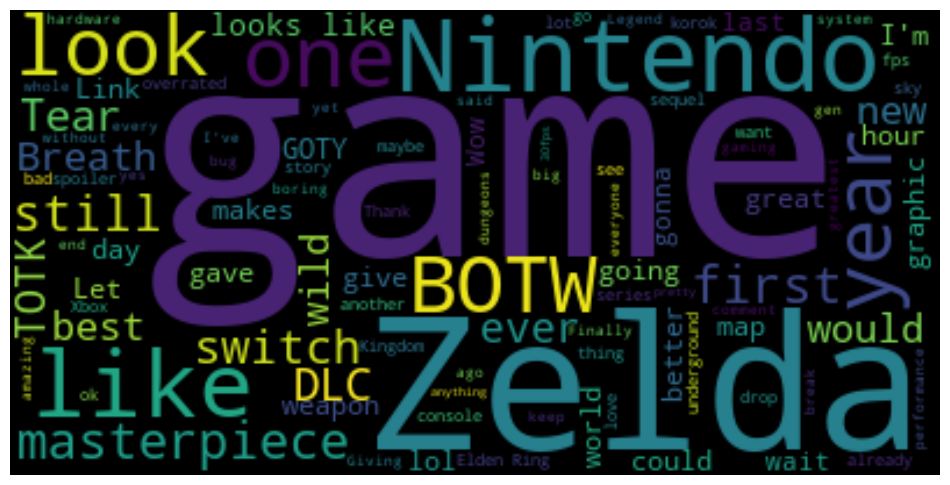

In [9]:
# WordCloud Visualization
word_cloud_text = ' '.join(df['comment'].dropna())
wordcloud = WordCloud(max_words=100, stopwords=custom_stopwords, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(12, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

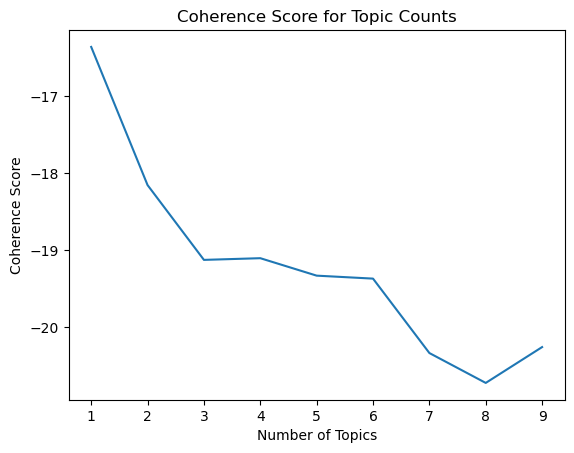

In [10]:
# Topic Modeling
data = text_processing(df['processed_comments'].values.tolist())
dictionary = Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Coherence Analysis for Topic Modeling
np.random.seed(1)
k_range = range(1, 10)
scores = []
for k in k_range:
    lda_model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=k, passes=20)
    cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    scores.append(cm.get_coherence())

plt.figure()
plt.plot(k_range, scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Topic Counts")
plt.show()


In [11]:
# Final LDA Model with Optimal Number of Topics
optimal_k = 6
model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=optimal_k, passes=20)
print(model.show_topics())

[(0, '0.006*"totk" + 0.006*"something" + 0.006*"thats" + 0.005*"switch" + 0.005*"shot" + 0.005*"lot" + 0.005*"heart" + 0.004*"cry" + 0.004*"last" + 0.004*"cmon"'), (1, '0.015*"year" + 0.013*"wow" + 0.008*"already" + 0.007*"wait" + 0.007*"tear" + 0.006*"day" + 0.006*"epona" + 0.006*"course" + 0.005*"yes" + 0.005*"emulate"'), (2, '0.009*"great" + 0.007*"fps" + 0.006*"amazing" + 0.006*"nintendo" + 0.005*"problem" + 0.005*"ending" + 0.005*"overrated" + 0.005*"hour" + 0.005*"hand" + 0.005*"comment"'), (3, '0.009*"dungeon" + 0.008*"break" + 0.007*"weapon" + 0.006*"lag" + 0.006*"redfall" + 0.005*"finally" + 0.005*"excited" + 0.005*"sword" + 0.005*"still" + 0.005*"botw"'), (4, '0.010*"dlc" + 0.010*"performance" + 0.009*"masterpiece" + 0.008*"botw" + 0.008*"ring" + 0.007*"welcome" + 0.007*"sequel" + 0.007*"best" + 0.005*"wait" + 0.004*"issue"'), (5, '0.011*"nintendo" + 0.007*"wild" + 0.006*"xbox" + 0.006*"switch" + 0.005*"could" + 0.005*"new" + 0.005*"console" + 0.005*"frame" + 0.005*"botw" + 0

The coherence score does not significantly improve beyond 6 topics, which suggests that adding more topics might not enhance interpretability.

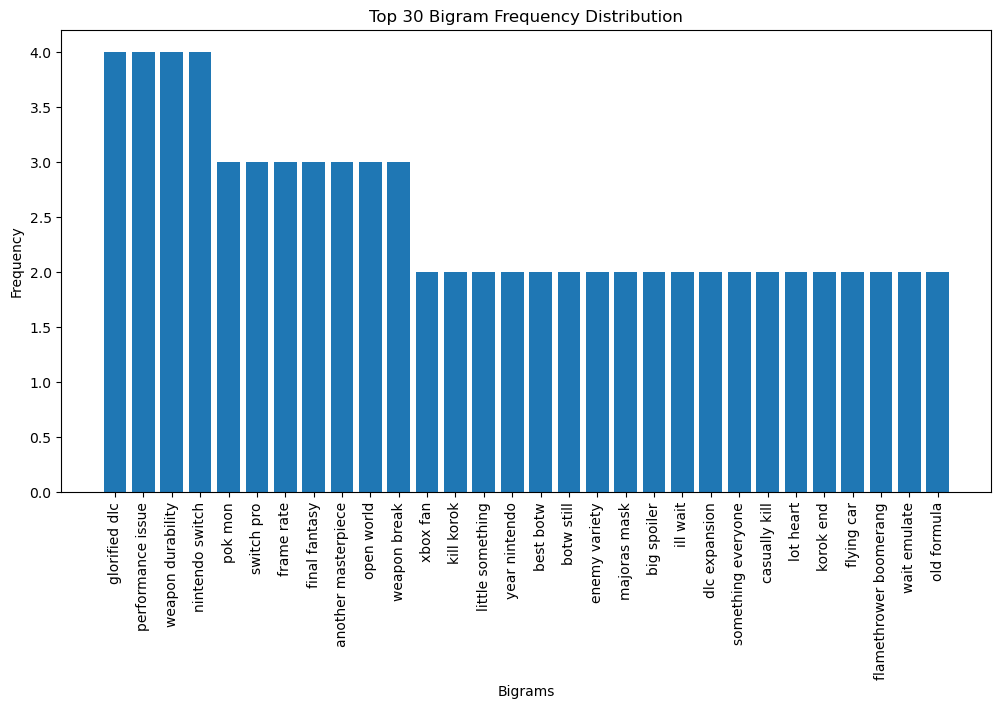

In [13]:
data_as_strings = [' '.join(tokens) for tokens in data]
df_ngrams = bigram_analysis(data_as_strings)

In [14]:
#Load the existing df_topics CSV file
title=DF['title'].unique()
file_path = r'C:/Users/giulia macis/Desktop/UBISOFT/df_good_topics.csv'
df_good_topics = pd.read_csv(file_path)
#Append the new row to the DataFrame
new_row = pd.DataFrame({'title': title, 'num_topics': optimal_k})
df_good_topics = pd.concat([df_good_topics, new_row], ignore_index=True)
# Save the updated DataFrame back to the CSV file
df_good_topics.to_csv(file_path, index=False)
df_good_topics

,title,num_topics
0,GTA 5 - Review,3
1,Space Marine 2 - Before You Buy,5
2,Alan Wake 2 - Before You Buy,4
3,Apex Legends - Before You Buy,2
4,PlayerUnknown's Battlegrounds (PS4) - Before Y...,4
5,Final Fantasy 7 Rebirth Review,4
6,Super Mario Bros. Wonder Review,4
7,Red Dead Redemption 2 Review,6
8,The Legend of Zelda: Tears of the Kingdom Review,6
